In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('imdb_top_1000.csv')

df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(float)

df['Gross'] = df['Gross'].str.replace(',', '').str.replace('$', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

In [ ]:
top_10_rated = df.sort_values(by='IMDB_Rating', ascending=False)[['Series_Title', 'IMDB_Rating']].head(10)
print("\tTop 10 film dengan IMDB rating tertinggi\n")
top_10_rated

	Top 10 film dengan IMDB rating tertinggi



,Series_Title,IMDB_Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
4,12 Angry Men,9.0
2,The Dark Knight,9.0
3,The Godfather: Part II,9.0
5,The Lord of the Rings: The Return of the King,8.9
7,Schindler's List,8.9
6,Pulp Fiction,8.9
8,Inception,8.8
12,"Il buono, il brutto, il cattivo",8.8


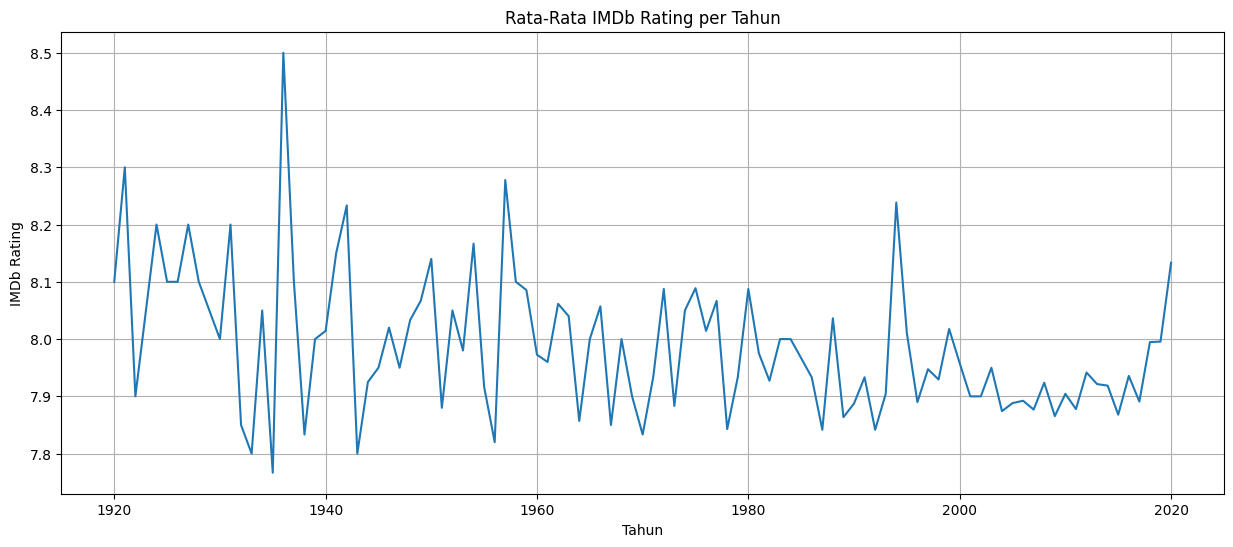

Rata-Rata IMDb Rating per Tahun

Released_Year
1920.0    8.100000
1921.0    8.300000
1922.0    7.900000
1924.0    8.200000
1925.0    8.100000
            ...   
2016.0    7.935714
2017.0    7.890909
2018.0    7.994737
2019.0    7.995652
2020.0    8.133333
Name: IMDB_Rating, Length: 99, dtype: float64 

Tahun dengan rata-rata rating tertinggi: 1936
Rata-rata rating tahun 1936: 8.50


In [ ]:
rating_per_year = df.groupby('Released_Year')['IMDB_Rating'].mean()
rating_per_year.plot(kind='line', figsize=(15,6), title='Rata-Rata IMDb Rating per Tahun')
plt.xlabel('Tahun')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()

best_year = rating_per_year.idxmax()
best_avg_rating = rating_per_year.max()

print(f"Rata-Rata IMDb Rating per Tahun\n")
print(rating_per_year, "\n")
print(f"Tahun dengan rata-rata rating tertinggi: {best_year:.0f}")
print(f"Rata-rata rating tahun {best_year:.0f}: {best_avg_rating:.2f}")

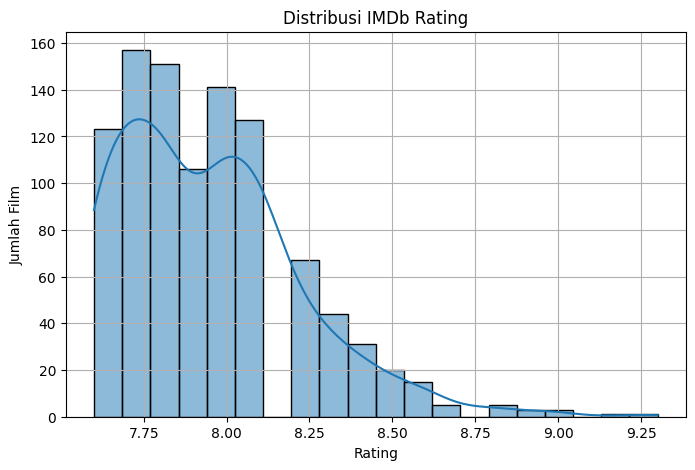

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True)
plt.title('Distribusi IMDb Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah Film')
plt.grid(True)
plt.show()


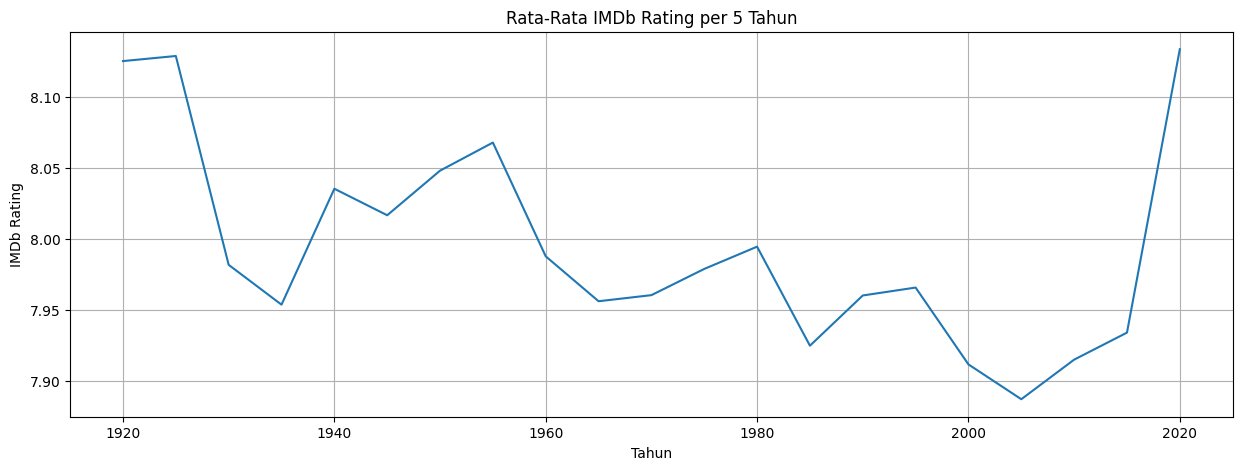

Year_Bin
1920.0    8.125000
1925.0    8.128571
1930.0    7.981818
1935.0    7.953846
1940.0    8.035294
1945.0    8.016667
1950.0    8.048000
1955.0    8.067742
1960.0    7.987805
1965.0    7.956250
1970.0    7.960526
1975.0    7.978947
1980.0    7.994595
1985.0    7.925000
1990.0    7.960294
1995.0    7.965854
2000.0    7.911864
2005.0    7.887395
2010.0    7.915200
2015.0    7.934188
2020.0    8.133333
Name: IMDB_Rating, dtype: float64

catatan: tahun film tahun 2021-2024 belum dimasukkan ke dalam dataset


In [4]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['Year_Bin'] = (df['Released_Year'] // 5) * 5

rating_per_5years = df.groupby('Year_Bin')['IMDB_Rating'].mean()
rating_per_5years.plot(kind='line', figsize=(15,5), title='Rata-Rata IMDb Rating per 5 Tahun')
plt.xlabel('Tahun')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()
print(rating_per_5years)
print("\ncatatan: tahun film tahun 2021-2024 belum dimasukkan ke dalam dataset")

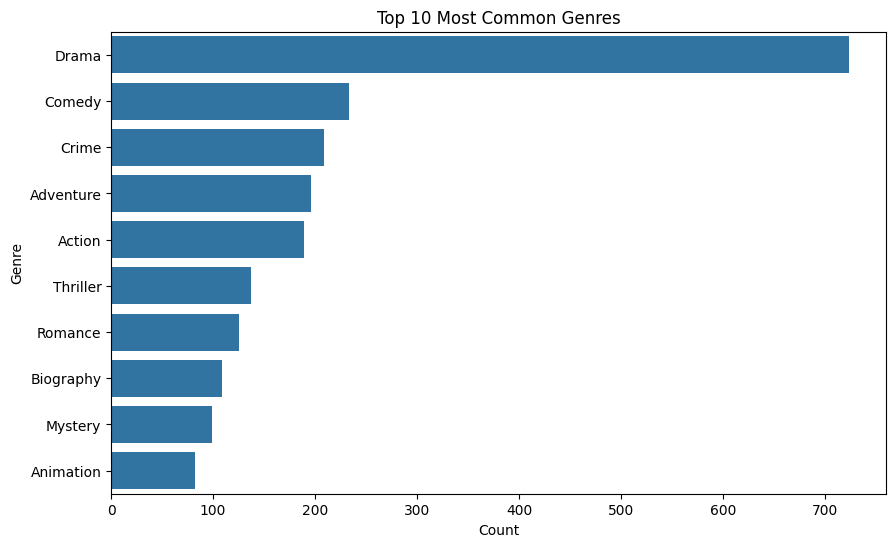

Genre
Drama        724
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Name: count, dtype: int64


In [ ]:
genre_series = df['Genre'].dropna().str.split(',')
genre_series = genre_series.apply(lambda x: [g.strip() for g in x])
all_genres = genre_series.explode()

top_10_genre = all_genres.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_genre.values, y=top_10_genre.index)
plt.title("Top 10 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

print(top_10_genre)

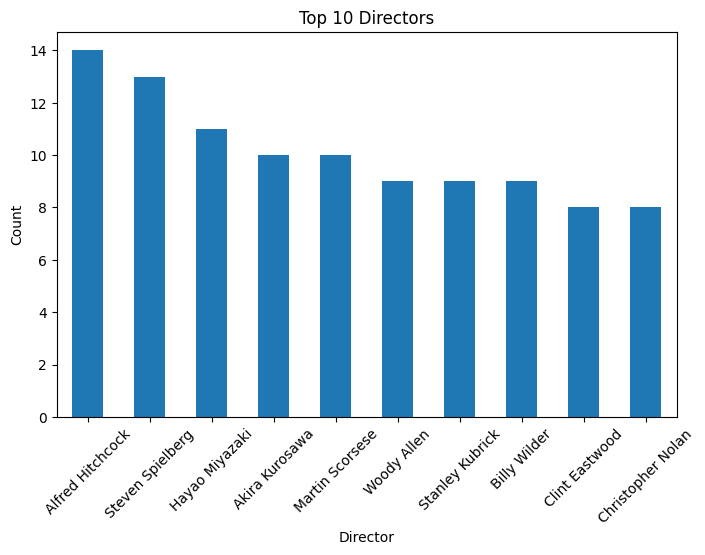


 Director
Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Akira Kurosawa       10
Martin Scorsese      10
Woody Allen           9
Stanley Kubrick       9
Billy Wilder          9
Clint Eastwood        8
Christopher Nolan     8
Name: count, dtype: int64


In [ ]:
top_10_director = df['Director'].value_counts().head(10)
top_10_director.plot(kind='bar', figsize=(8,5), title='Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print("\n", top_10_director)

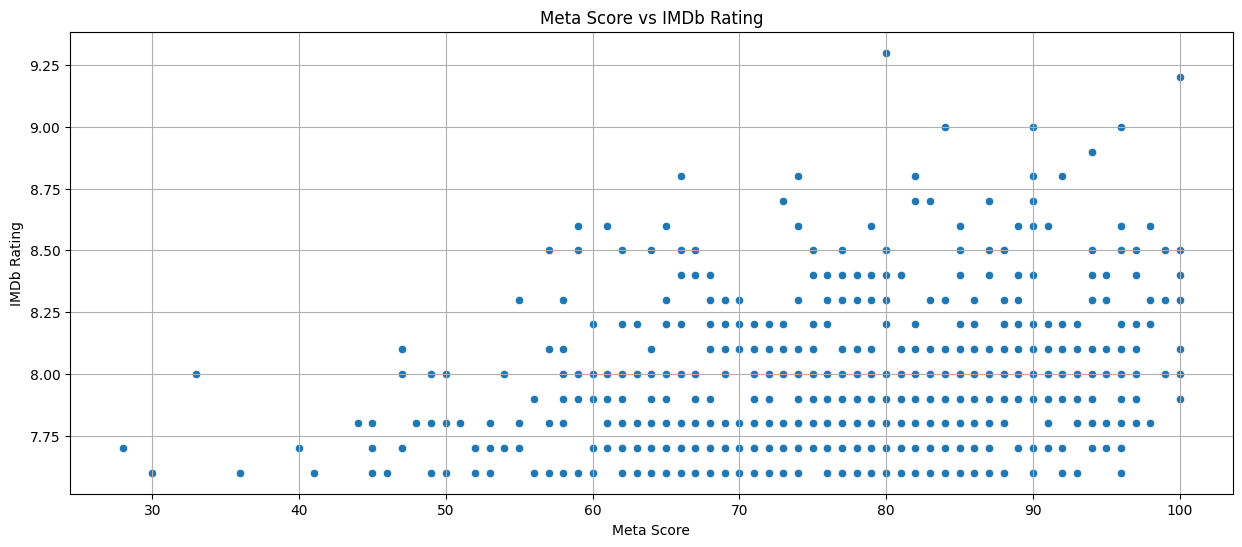

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Meta_score', y='IMDB_Rating', data=df)
plt.title('Meta Score vs IMDb Rating')
plt.xlabel('Meta Score')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()

Koefisien korelasi antara runtime dan rating: 0.24


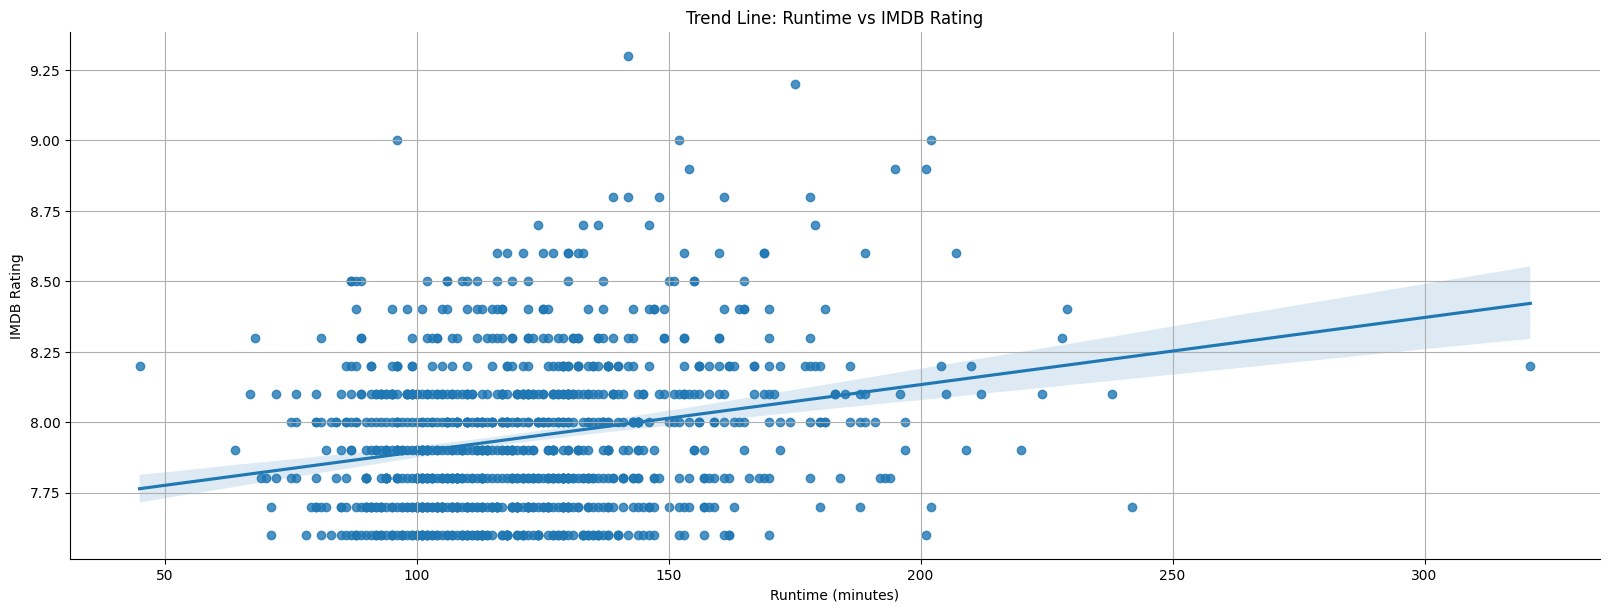


Berdasarkan perhitungan korelasi, nilai Pearson antara Runtime dan IMDB_Rating adalah 0.24, yang menunjukkan korelasi positif lemah.
Plot juga memperlihatkan bahwa film dengan durasi sedikit lebih panjang cenderung memiliki rating lebih tinggi, namun hubungan ini tidak terlalu kuat.


In [ ]:
correlation = df['Runtime'].corr(df['IMDB_Rating'])
print(f"Koefisien korelasi antara runtime dan rating: {correlation:.2f}")

sns.lmplot(data=df, x='Runtime', y='IMDB_Rating', height=6, aspect=2.7)
plt.title('Trend Line: Runtime vs IMDB Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDB Rating')
plt.grid(True)
plt.show()

print("\nBerdasarkan perhitungan korelasi, nilai Pearson antara Runtime dan IMDB_Rating adalah 0.24, yang menunjukkan korelasi positif lemah.\nPlot juga memperlihatkan bahwa film dengan durasi sedikit lebih panjang cenderung memiliki rating lebih tinggi, namun hubungan ini tidak terlalu kuat.")

In [ ]:
top_gross = df[['Series_Title', 'Gross']].sort_values(by='Gross', ascending=False).head(10)
print("\tTop 10 film dengan Gross tertinggi (USD)\n")
top_gross

	Top 10 film dengan Gross tertinggi (USD)



,Series_Title,Gross
477,Star Wars: Episode VII - The Force Awakens,936662225.0
59,Avengers: Endgame,858373000.0
623,Avatar,760507625.0
60,Avengers: Infinity War,678815482.0
652,Titanic,659325379.0
357,The Avengers,623279547.0
891,Incredibles 2,608581744.0
2,The Dark Knight,534858444.0
582,Rogue One,532177324.0
63,The Dark Knight Rises,448139099.0
